# Google Colab Lab Assignment -NLP
Course Name: Deep Learning

Lab Title: NLP Techniques for Text Classification

Student Name:**Shruti Deokar**

Student ID:**202201040207**

Date of Submission: 1/4/2025

Group Members: **Riya Garasangi**

Objective The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.

Learning Outcomes:

Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

Implement text vectorization techniques such as TF-IDF and CountVectorizer.

Develop a text classification model using a machine learning algorithm.

Evaluate the performance of the model using suitable metrics.

# Assignment Instructions:
Part 1: NLP Preprocessing

Dataset Selection:

Dataset: **Twitter Sentiment Analysis Dataset** https://huggingface.co/datasets/carblacac/twitter-sentiment-analysis

This dataset groups tweets labeled according to the sentiment they convey, often positive, negative or neutral. It's ideal for NLP models targeting social networks, as it includes informal language, abbreviations and short expressions specific to the tweet format.


Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.

In [ ]:
import os
print(os.listdir())


['.config', '.ipynb_checkpoints', 'Sentiment Analysis Dataset.csv', 'sample_data']


In [ ]:
df = pd.read_csv('Sentiment Analysis Dataset.csv', delimiter=',', on_bad_lines='skip', encoding='ISO-8859-1')


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Load the dataset (Twitter Sentiment Analysis from Kaggle)
df = pd.read_csv('Sentiment Analysis Dataset.csv', delimiter=',', on_bad_lines='skip', encoding='ISO-8859-1')

# Fix column names (remove BOM if present)
df.columns = df.columns.str.replace('ï»¿', '', regex=True)

# Display dataset structure
print("Dataset Structure:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check label distribution
print("\nLabel Distribution:")
if 'Sentiment' in df.columns:
    print(df['Sentiment'].value_counts())
else:
    print("Sentiment column not found, check dataset structure.")

# Ensure SentimentText column exists
if 'SentimentText' in df.columns:
    text_col = 'SentimentText'
else:
    raise ValueError("SentimentText column not found in the dataset.")

# Preprocess text: convert to lowercase and remove punctuation
def preprocess_text(text):
    if pd.isna(text):
        return ""  # Handle missing values
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    return text

df['cleaned_text'] = df[text_col].apply(preprocess_text)

# Tokenization
df['tokens'] = df['cleaned_text'].apply(lambda x: word_tokenize(x) if isinstance(x, str) and len(x) > 0 else [])

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens_no_stopwords'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Stemming (using PorterStemmer)
stemmer = PorterStemmer()
df['stemmed'] = df['tokens_no_stopwords'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Lemmatization (using WordNetLemmatizer)
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens_no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Convert processed tokens back to text for vectorization
df['final_text'] = df['lemmatized'].apply(lambda tokens: ' '.join(tokens))

# Vectorization (TF-IDF & CountVectorizer)
vectorizer_tf = TfidfVectorizer()
vectorizer_cv = CountVectorizer()

# TF-IDF Matrix
tf_idf_matrix = vectorizer_tf.fit_transform(df['final_text'])

# Count Vectorizer Matrix
count_matrix = vectorizer_cv.fit_transform(df['final_text'])

# Print the shapes of the matrices
print("\nTF-IDF Matrix Shape:", tf_idf_matrix.shape)
print("Count Vectorizer Matrix Shape:", count_matrix.shape)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Dataset Structure:
   ItemID  Sentiment SentimentSource  \
0       1          0    Sentiment140   
1       2          0    Sentiment140   
2       3          1    Sentiment140   
3       4          0    Sentiment140   
4       5          0    Sentiment140   

                                       SentimentText  
0                       is so sad for my APL frie...  
1                     I missed the New Moon trail...  
2                            omg its already 7:30 :O  
3            .. Omgaga. Im sooo  im gunna CRy. I'...  
4           i think mi bf is cheating on me!!!   ...  

Missing values:
ItemID             0
Sentiment          0
SentimentSource    0
SentimentText      0
dtype: int64

Label Distribution:
Sentiment
1    790177
0    788435
Name: count, dtype: int64

TF-IDF Matrix Shape: (1578612, 779217)
Count Vectorizer Matrix Shape: (1578612, 779217)



Logistic Regression Model Evaluation:
Accuracy: 0.7830
Precision: 0.7677
Recall: 0.8123
F1-score: 0.7893


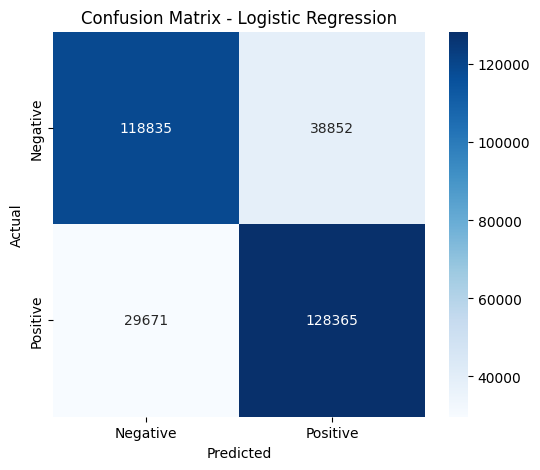


Naïve Bayes Model Evaluation:
Accuracy: 0.7637
Precision: 0.7858
Recall: 0.7257
F1-score: 0.7546


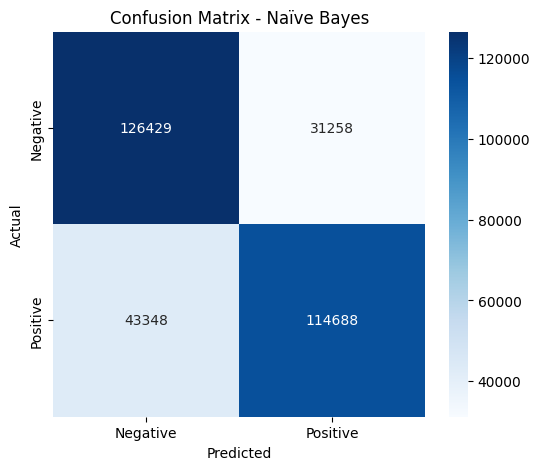

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Extract feature matrix (TF-IDF) and target labels
X = tf_idf_matrix  # Using TF-IDF features
y = df['Sentiment']  # Target column (Sentiment)

# Splitting the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Train the Naïve Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

# Model Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n{model_name} Model Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log, "Logistic Regression")

# Evaluate Naïve Bayes
evaluate_model(y_test, y_pred_nb, "Naïve Bayes")


# Submission Guidelines:

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.

**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I, Shruti Deokar, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: Shruti Jitendra Deokar

Submission Checklist

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion

